In [1]:
import px4tools
import pandas
import pylab as pl
%matplotlib inline
pl.rcParams['figure.figsize'] = (15,5)

In [2]:
data = px4tools.process_data(
    pandas.read_csv('logs/15-9-30-11_44_47-kabir-crash.csv'))

{'DIST_Distance_dt': 0,
 'DIST_Distance_mean': 0,
 'DIST_Distance_noise_power': 0,
 'DIST_Distance_stddev': 0,
 'GPS_VelD_dt': 0.10078501459034794,
 'GPS_VelD_mean': -0.021938152911939922,
 'GPS_VelD_noise_power': 0.0024772052095496677,
 'GPS_VelD_stddev': 0.15677723863580798,
 'GPS_VelE_dt': 0.1006720269058296,
 'GPS_VelE_mean': -0.0018680845903460129,
 'GPS_VelE_noise_power': 0.0023111653803392818,
 'GPS_VelE_stddev': 0.15151691018745062,
 'GPS_VelN_dt': 0.1006720269058296,
 'GPS_VelN_mean': 0.0082606980942136737,
 'GPS_VelN_noise_power': 0.0021127981591926902,
 'GPS_VelN_stddev': 0.14486871188652639,
 'GPS_X_dt': 0.10845343961352659,
 'GPS_X_mean': 0.66475007597130464,
 'GPS_X_noise_power': 0.030493234274219475,
 'GPS_X_stddev': 0.53024927093676344,
 'GPS_Y_dt': 0.10845343961352659,
 'GPS_Y_mean': 0.31974724941363009,
 'GPS_Y_noise_power': 0.0057007261691499689,
 'GPS_Y_stddev': 0.22926799082693478,
 'GPS_Z_dt': 0.10180249262202043,
 'GPS_Z_mean': 3.8362677956562368,
 'GPS_Z_noise_p

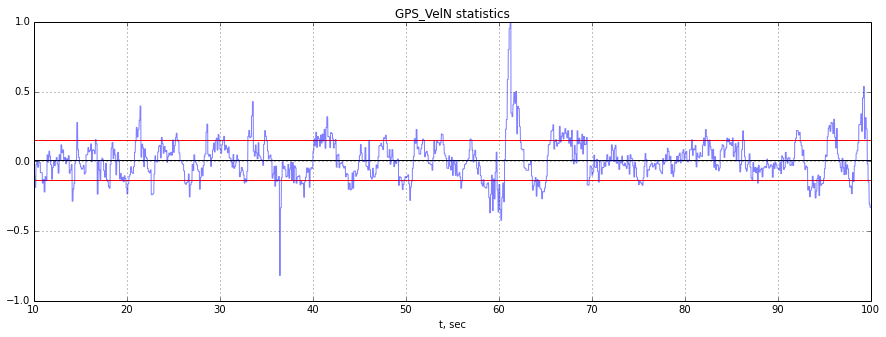

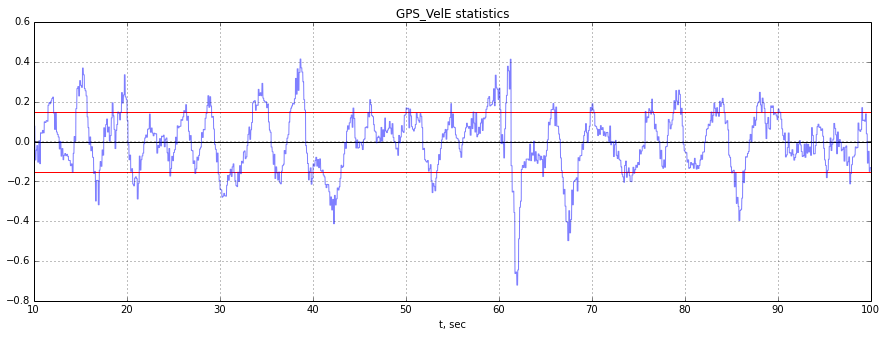

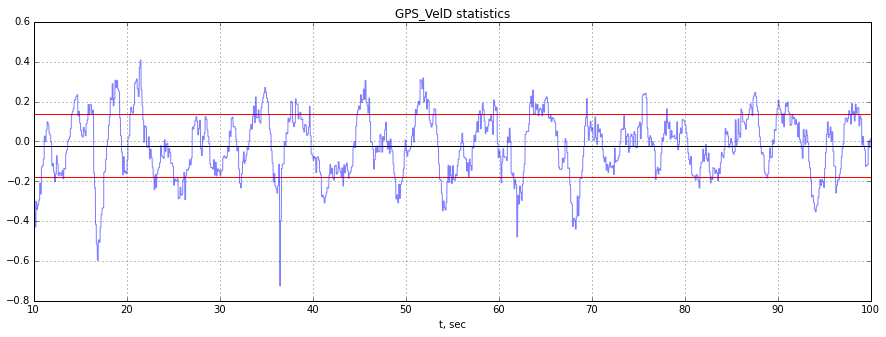

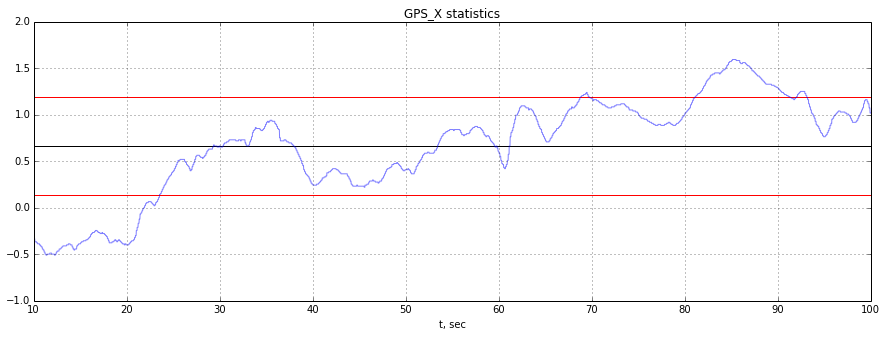

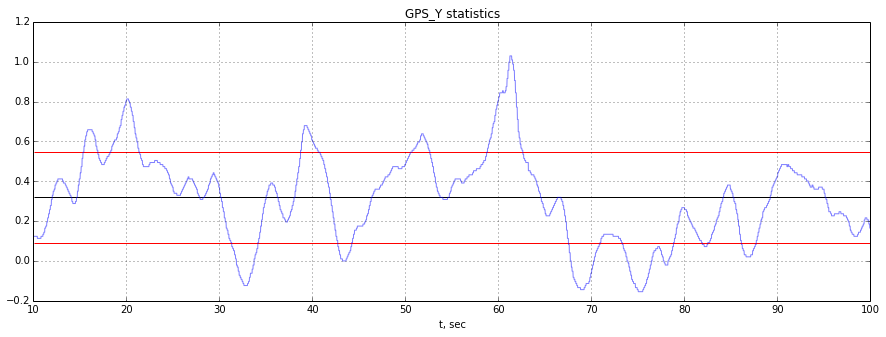

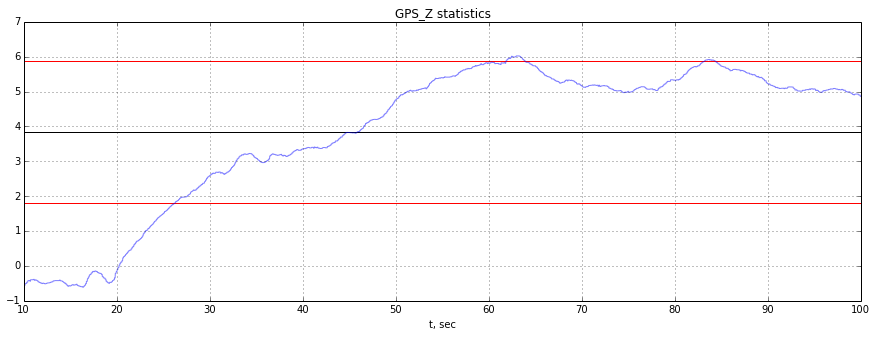

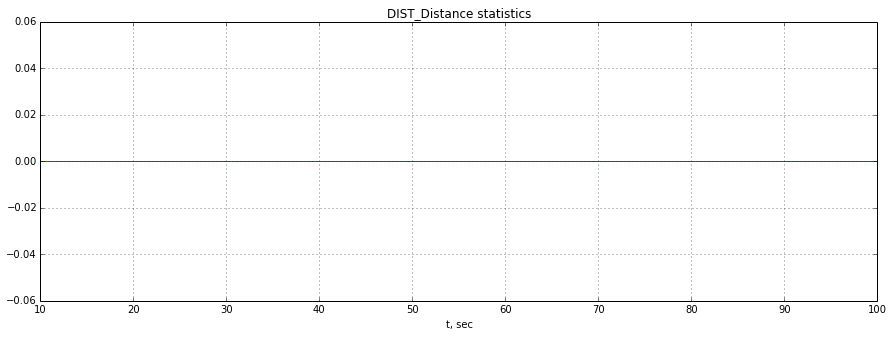

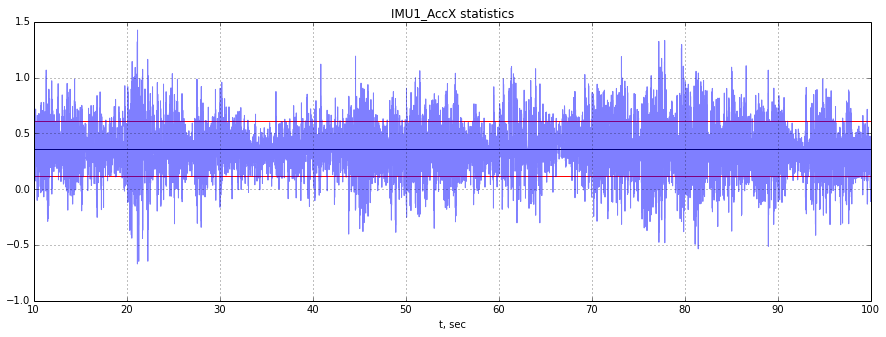

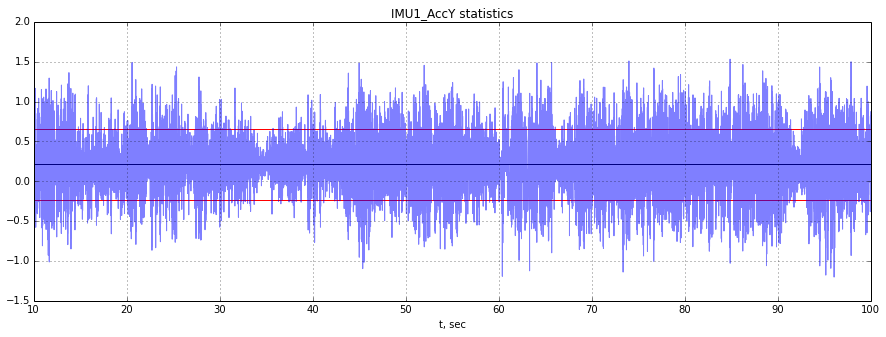

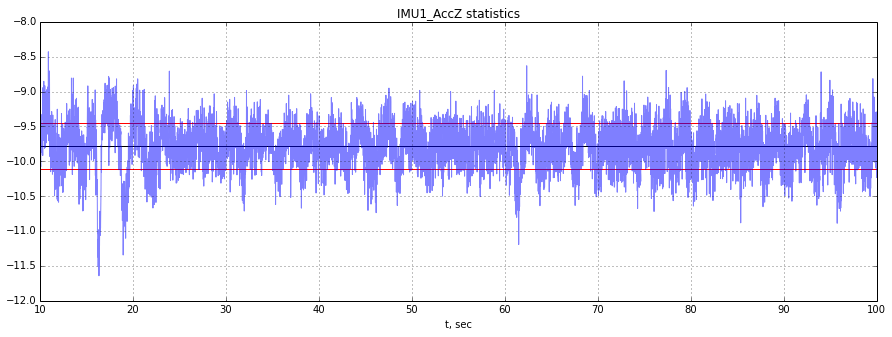

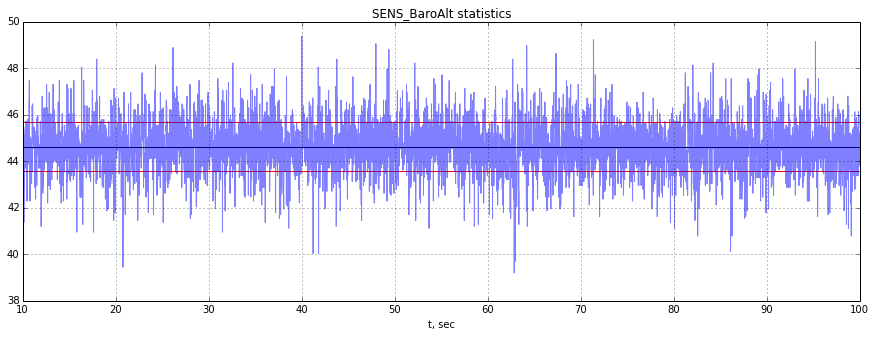

In [8]:
px4tools.statistics(data[10:100], [
        'GPS_VelN', 'GPS_VelE', 'GPS_VelD',
        'GPS_X', 'GPS_Y', 'GPS_Z', 'DIST_Distance',
                        'IMU1_AccX', 'IMU1_AccY', 'IMU1_AccZ', 'SENS_BaroAlt'], plot=True)

In [11]:
px4tools.find_lpe_gains(data[10:100])

{'LPE_ACC_XY': 0.000735915925487951,
 'LPE_ACC_Z': 0.0013686317016863641,
 'LPE_BAR_Z': 1.0520127982555052,
 'LPE_GPS_VXY': 0.15151691018745062,
 'LPE_GPS_VZ': 0.15677723863580798,
 'LPE_GPS_XY': 0.53024927093676344,
 'LPE_GPS_Z': 2.0419812493429053,
 'LPE_LDR_Z': 0}

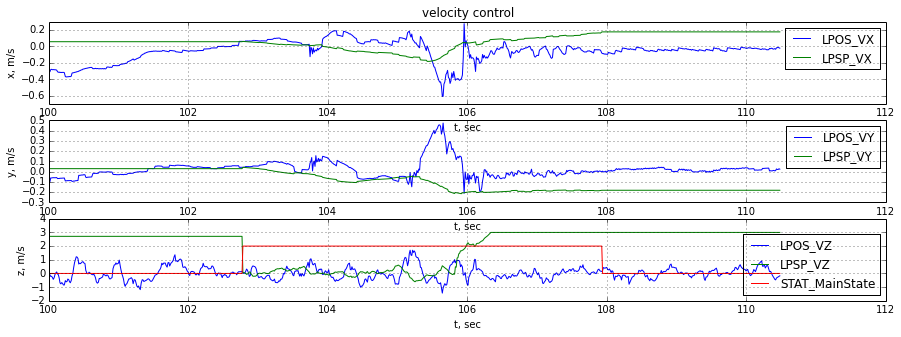

In [5]:
px4tools.plot_velocity_loops(data1)
data1.STAT_MainState.plot()

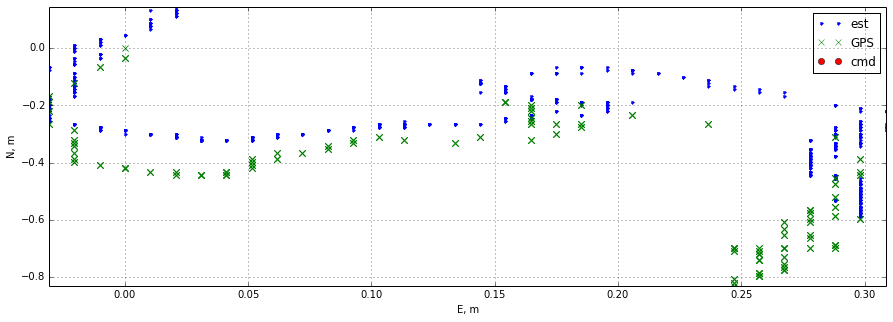

In [6]:
px4tools.pos_analysis(data1[1:200]);

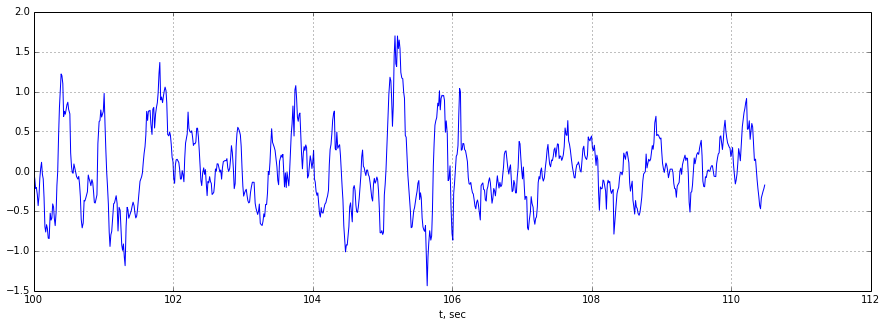

In [7]:
data1.LPOS_VZ.plot()

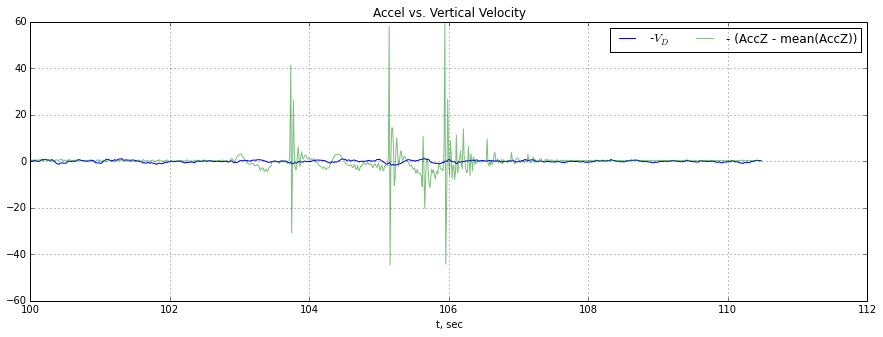

In [94]:
(-1*data1.LPOS_VZ).plot(label='-$V_D$')
(-1*(data1.IMU1_AccZ - data1.IMU1_AccZ.mean())).plot(label='- (AccZ - mean(AccZ))', alpha=0.5)
pl.legend(loc='best', ncol=5)
pl.title('Accel vs. Vertical Velocity ')

In [148]:
def deriv(data, name='deriv ' + data.columns[0]):
    dt = pl.gradient(pl.array(data.index, float))
    return pandas.DataFrame(
        data=pl.gradient(data.values[:,0])/dt, index=data.index, columns=[name])

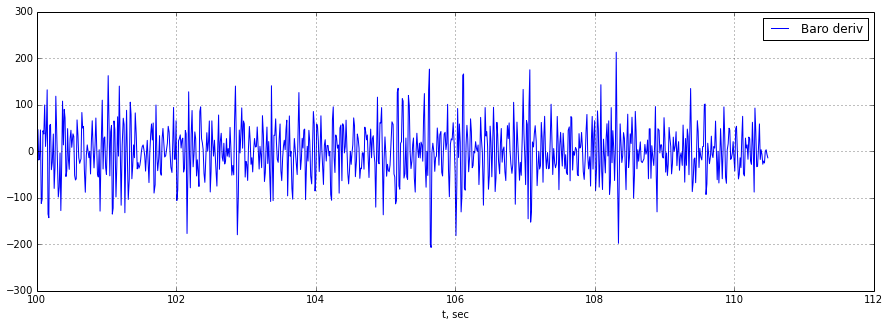

In [113]:
#pl.plot(data.SENS_BaroAlt)
deriv(data1.SENS_BaroAlt, 'Baro deriv').plot()

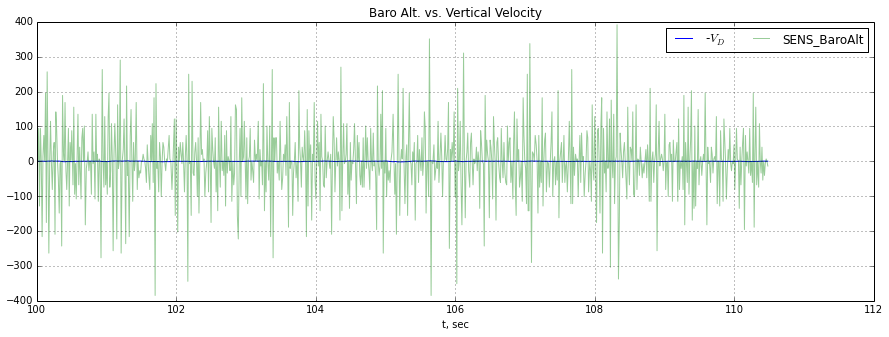

In [51]:
(-1*data1.LPOS_VZ).plot(label='-$V_D$')
#(-1*(data1.IMU1_AccZ - data1.IMU1_AccZ.mean())).plot(label='- (AccZ - mean(AccZ))')
deriv(data1.SENS_BaroAlt).plot(alpha=0.4)
pl.legend(loc='best', ncol=5)
pl.title('Baro Alt. vs. Vertical Velocity ')

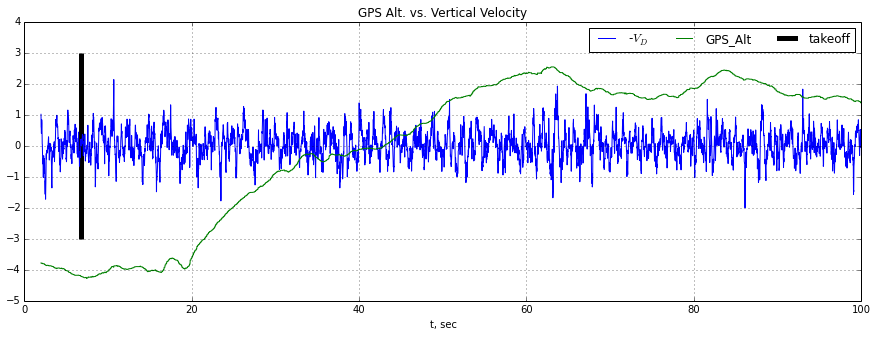

In [139]:
data1 = data[2:100]
(-1*data1.LPOS_VZ).plot(label='-$V_D$')
#(-1*(data1.IMU1_AccZ - data1.IMU1_AccZ.mean())).plot(label='- (AccZ - mean(AccZ))')
(data1.GPS_Alt - data1.GPS_Alt.mean()).plot()
pl.vlines(6.75, -3, 3, label='takeoff', linewidth=5)
pl.legend(loc='best', ncol=5)
pl.title('GPS Alt. vs. Vertical Velocity ')

In [18]:
px4tools.find_lpe_gains(data[100:150], printing=True);

LPE_BAR_Z	=	1.058
LPE_GPS_XY	=	0.200
LPE_ACC_Z	=	1854.458
LPE_GPS_VXY	=	0.171
LPE_ACC_XY	=	307.815
LPE_LDR_Z	=	0.000
LPE_GPS_Z	=	0.157
LPE_GPS_VZ	=	0.260
